In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from scipy.optimize import minimize
import numpy as np

Define a utility function. q is effort expended, U is final utility after earning the badge, v is the long-term average payoff, gamma is a discount rate, and p is the preferred effort level.

In [2]:
def utility(q, U, v=1, gamma=0.75, p=0.5):
    return -(-(p - q)**2 + gamma*q*U)/(v - gamma + q*gamma)

In [3]:
qstar = minimize(utility, 0.5, args=(2.751))
print qstar["x"][0]
print -qstar["fun"]

0.842334466352
1.83810846486


In [58]:
def graph(U, v, gamma, p, T):
    Ts = np.arange(0, T + 1, 1)
    utilities = [U]
    efforts = [p]
    while T > 0:
        optim = minimize(utility, 0.5, args=(utilities[-1], v, gamma, p))
        utilities.append(-optim["fun"])
        efforts.append(optim["x"][0])
        T -= 1
    fig, ax1 = plt.subplots();
    ax1.plot(Ts, utilities[::-1], label="Utility", c="b");
    ax1.tick_params("y", colors="b")
    ax1.set_xlabel("Time");
    ax1.set_ylabel("Utility");
    ax2 = ax1.twinx();
    ax2.plot(Ts, efforts[::-1], label="Effort", c="r");
    ax2.tick_params("y", colors="r");
    ax2.set_ylabel("Effort");
    fig.tight_layout();

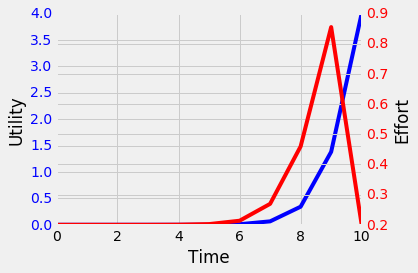

In [59]:
graph(4, 1, 0.5, 0.2, 10)